In [41]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Air_tags_dataset.csv")

In [3]:
df.head()

,Tag_Name,Price,Value_for_Money,Year_of_Launch,Country,State,Sales,Total_Users,Total_Revenue,Profit,Best_in_Tech,Practical_Use_Case
0,Apple_airtags,29,High,2021,United Kingdom,Monmouthshire [Sir Fynwy GB-FYN],1360,742,39440,10094.202610,Precision Finding with U1 Chip,"Tracking keys, wallets, and small items"
1,Apple_airtags,29,High,2021,United Kingdom,Redcar and Cleveland,3592,1936,104168,13666.727439,Precision Finding with U1 Chip,"Tracking keys, wallets, and small items"
2,Apple_airtags,29,High,2021,United Kingdom,Staffordshire,4926,3028,142854,23819.721987,Precision Finding with U1 Chip,"Tracking keys, wallets, and small items"
3,Apple_airtags,29,High,2021,United Kingdom,Wrexham [Wrecsam GB-WRC],3419,2314,99151,10323.294639,Precision Finding with U1 Chip,"Tracking keys, wallets, and small items"
4,Apple_airtags,29,High,2021,United Kingdom,Bracknell Forest,1269,863,36801,10588.035649,Precision Finding with U1 Chip,"Tracking keys, wallets, and small items"


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Aggregate sales by country
country_sales = df.groupby('Country')['Sales'].sum().reset_index()

In [6]:
country_sales

,Country,Sales
0,India,183198
1,United Kingdom,1217966
2,United States,321170


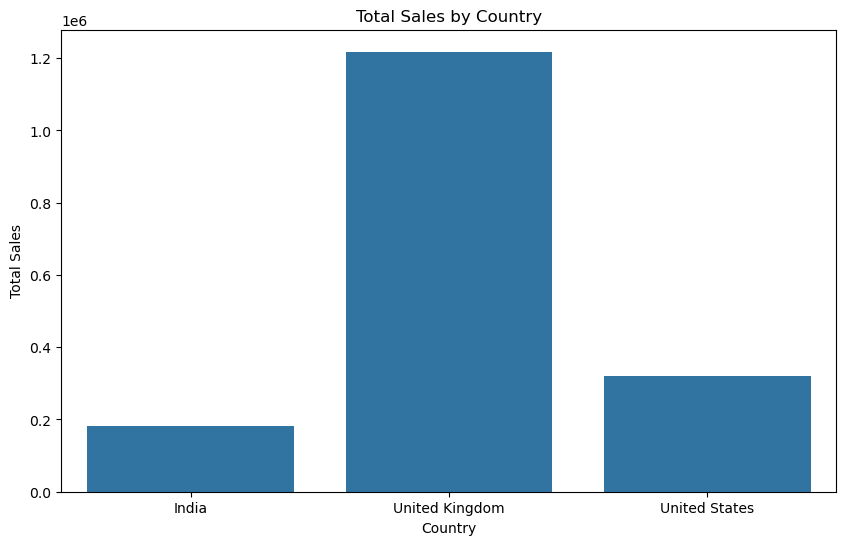

In [11]:
# Bar plot - Slaes by country
plt.figure(figsize=(10,6))
sns.barplot(x=country_sales['Country'], y=country_sales['Sales'])
plt.title("Total Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.show()

In [8]:
# Aggregate sales by product
product_sales = df.groupby('Tag_Name')['Sales'].sum()

In [9]:
product_sales

Tag_Name
Apple_airtags    886279
Jio_tags         836055
Name: Sales, dtype: int64

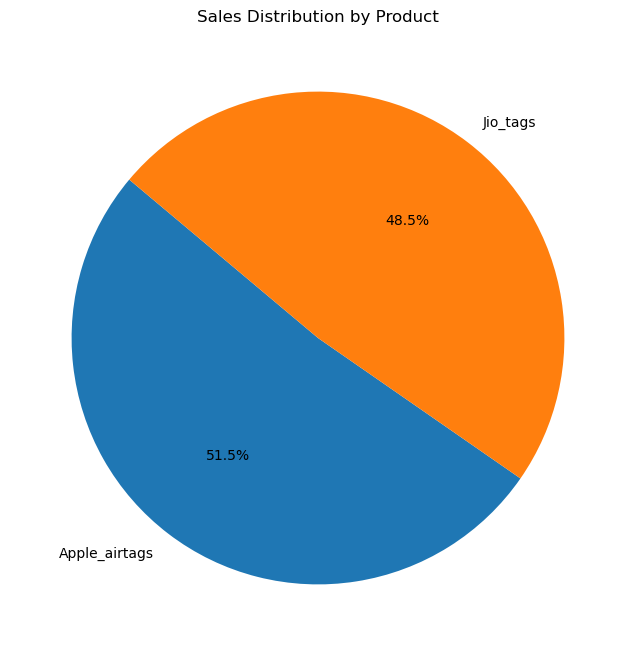

In [12]:
# Pie chart - Distribution of products
plt.figure(figsize=(8, 8))
plt.pie(product_sales, labels=product_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Product')
plt.show()

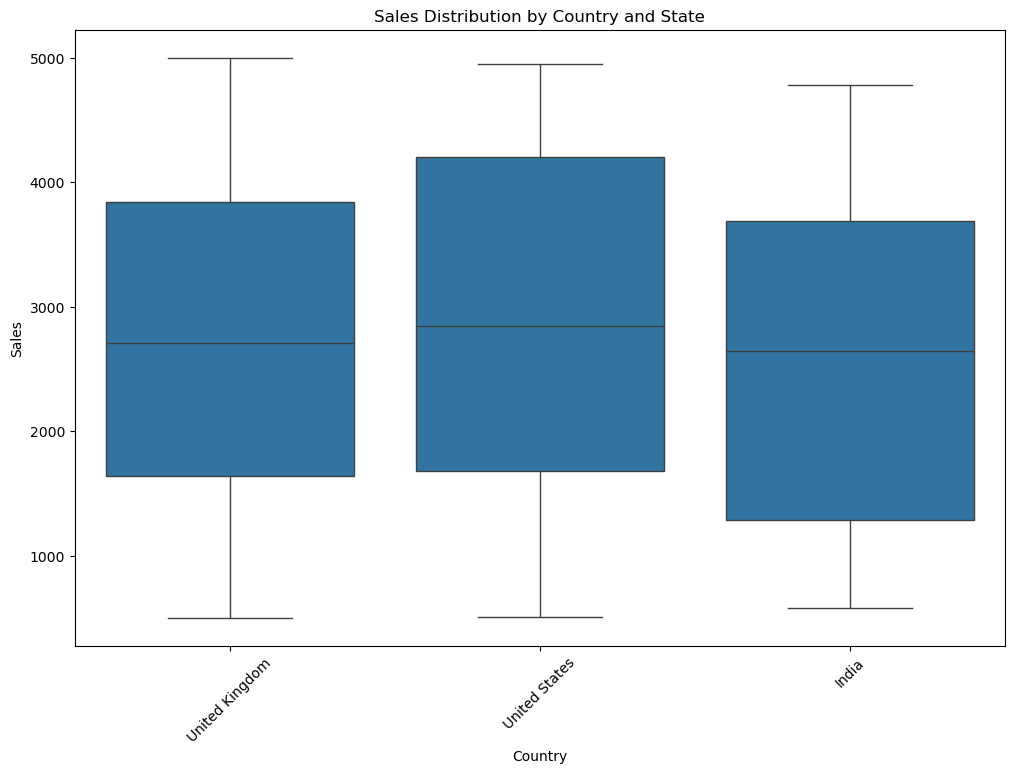

In [13]:
# Box plot - Sales Distribution by State
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Sales', data=df)
plt.title('Sales Distribution by Country and State')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Calculate correlation matrix
corr = df.corr()

C:\Users\Vairabharathi VR\AppData\Local\Temp\ipykernel_24812\548291884.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [15]:
corr

,Price,Year_of_Launch,Sales,Total_Users,Total_Revenue,Profit
Price,1.000000,-1.000000,0.059888,0.055241,0.439800,0.357475
Year_of_Launch,-1.000000,1.000000,-0.059888,-0.055241,-0.439800,-0.357475
Sales,0.059888,-0.059888,1.000000,0.966475,0.903327,0.773618
Total_Users,0.055241,-0.055241,0.966475,1.000000,0.872334,0.753167
Total_Revenue,0.439800,-0.439800,0.903327,0.872334,1.000000,0.850101
Profit,0.357475,-0.357475,0.773618,0.753167,0.850101,1.000000


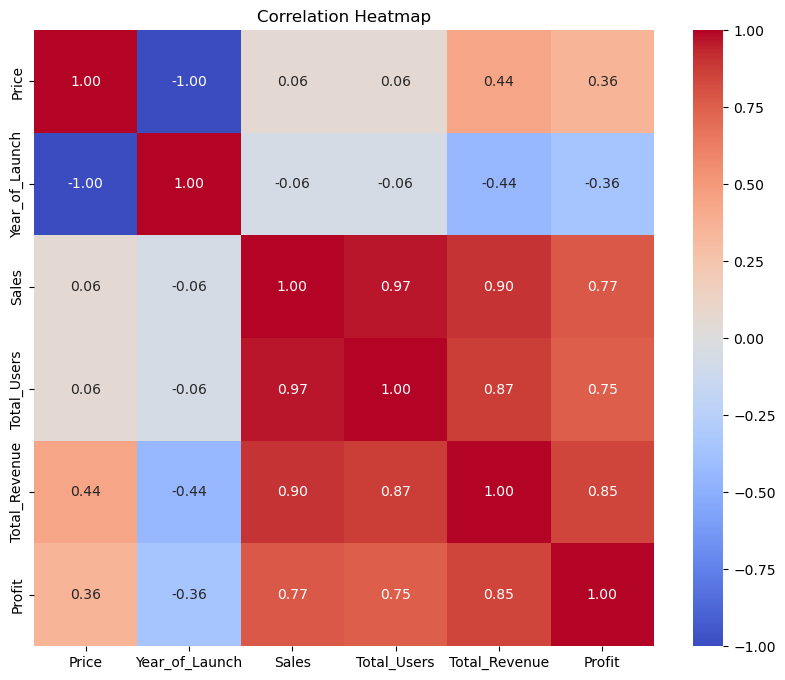

In [16]:
# Heatmap - Correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

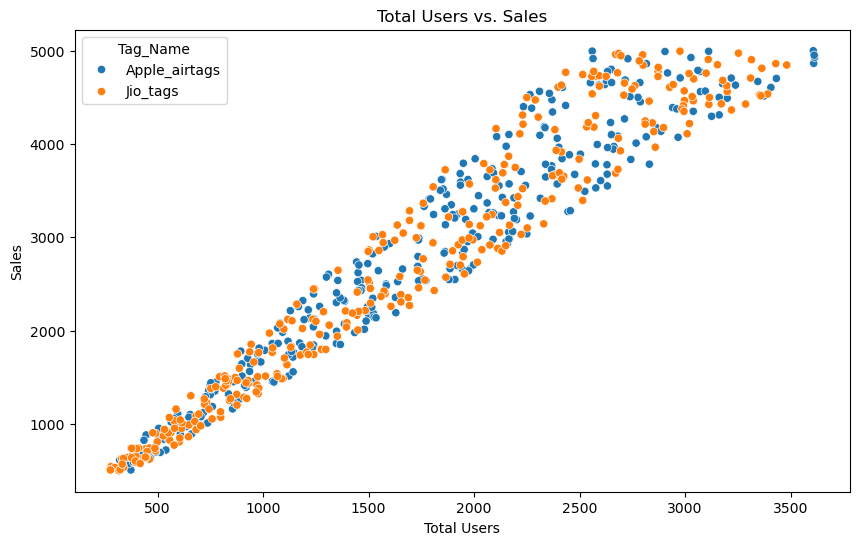

In [18]:
# Scatter plot - Total users vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Total_Users'], y=df['Sales'], hue=df['Tag_Name'])
plt.title('Total Users vs. Sales')
plt.xlabel('Total Users')
plt.ylabel('Sales')
plt.show()

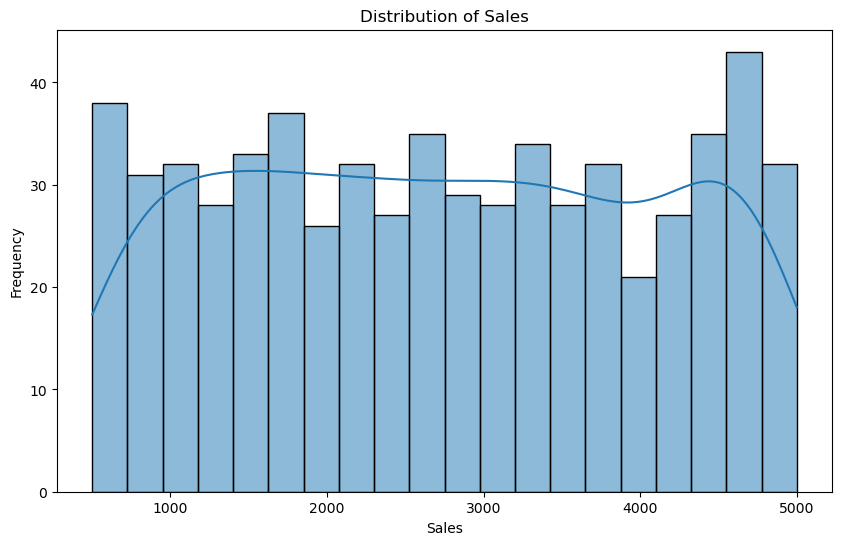

In [19]:
# Histogram of Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

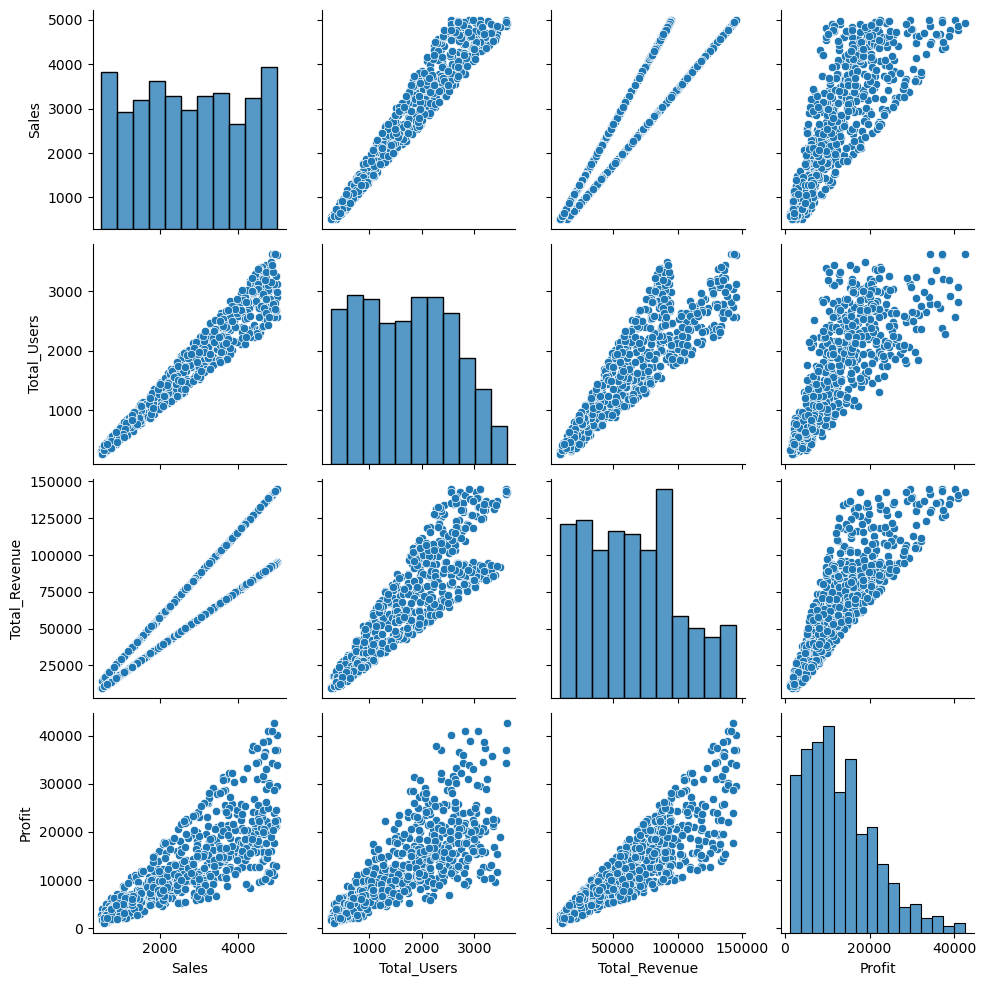

In [24]:
# Pair plot: Relationships between Numerical Features
sns.pairplot(df[['Sales', 'Total_Users', 'Total_Revenue', 'Profit']])
plt.show()

In [25]:
# Aggregate total users by country and product
users_by_country = df.groupby(['Country', 'Tag_Name'])['Total_Users'].sum().unstack()

In [26]:
users_by_country

Tag_Name,Apple_airtags,Jio_tags
Country,,
India,62677,50406
United Kingdom,382921,378331
United States,108054,95110


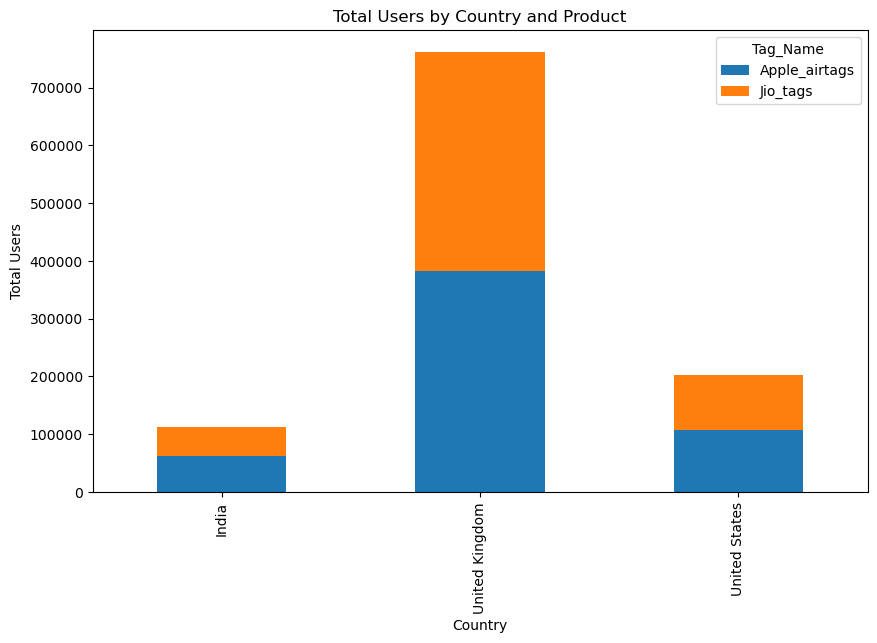

In [27]:
# Stacked bar chart
users_by_country.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Users by Country and Product')
plt.ylabel('Total Users')
plt.show()

## Percentage of Success for the product

In [32]:
df_1 = df[df['Country']=='India'].reset_index()

In [35]:
df_1.drop('index', axis=1, inplace=True)

In [36]:
df_1

,Tag_Name,Price,Value_for_Money,Year_of_Launch,Country,State,Sales,Total_Users,Total_Revenue,Profit,Best_in_Tech,Practical_Use_Case
0,Apple_airtags,29,High,2021,India,Arunāchal Pradesh,3208,1908,93032,23151.006722,Precision Finding with U1 Chip,"Tracking keys, wallets, and small items"
1,Apple_airtags,29,High,2021,India,Gujarāt,701,491,20329,2051.732879,Precision Finding with U1 Chip,"Tracking keys, wallets, and small items"
2,Apple_airtags,29,High,2021,India,Lakshadweep,1074,648,31146,8493.627202,Precision Finding with U1 Chip,"Tracking keys, wallets, and small items"
3,Apple_airtags,29,High,2021,India,Punjab,885,545,25665,5034.636209,Precision Finding with U1 Chip,"Tracking keys, wallets, and small items"
4,Apple_airtags,29,High,2021,India,Uttar Pradesh,4100,2651,118900,12671.093818,Precision Finding with U1 Chip,"Tracking keys, wallets, and small items"
...,...,...,...,...,...,...,...,...,...,...,...,...
67,Jio_tags,19,Medium,2023,India,Delhi,865,646,16435,4834.355111,Affordable Pricing with Decent Accuracy,"Tracking bags, kids’ school bags, and pets"
68,Jio_tags,19,Medium,2023,India,Kerala,3046,1664,57874,7802.680735,Affordable Pricing with Decent Accuracy,"Tracking bags, kids’ school bags, and pets"
69,Jio_tags,19,Medium,2023,India,Nāgāland,1272,845,24168,6111.471700,Affordable Pricing with Decent Accuracy,"Tracking bags, kids’ school bags, and pets"
70,Jio_tags,19,Medium,2023,India,Telangāna,2073,1079,39387,7992.863672,Affordable Pricing with Decent Accuracy,"Tracking bags, kids’ school bags, and pets"


In [37]:
df['Made_in_India'] = 1

In [39]:
df['Cheaper_Price'] = df['Price']* 0.75 # Assuming 25% price reduction

In [42]:
# Defining success as a binary outcome (for Example sales>3000)
df['Success'] = np.where(df['Sales']>3000, 1, 0)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Value_for_Money_Encoded'] = le.fit_transform(df['Value_for_Money'])

In [47]:
# Define the feature set and target variable
X = df[['Price', 'Value_for_Money_Encoded', 'Total_Users', 'Made_in_India', 'Cheaper_Price']]
y = df['Success']

In [60]:
X

,Price,Value_for_Money_Encoded,Total_Users,Made_in_India,Cheaper_Price
0,29,0,742,1,21.75
1,29,0,1936,1,21.75
2,29,0,3028,1,21.75
3,29,0,2314,1,21.75
4,29,0,863,1,21.75
...,...,...,...,...,...
623,19,1,646,1,14.25
624,19,1,1664,1,14.25
625,19,1,845,1,14.25
626,19,1,1079,1,14.25


In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Make predictions
y_pred = model.predict(X_test)

In [52]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f"Confustion Matrix:\n {confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.89
Confustion Matrix:
 [[73  7]
 [ 7 39]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        80
           1       0.85      0.85      0.85        46

    accuracy                           0.89       126
   macro avg       0.88      0.88      0.88       126
weighted avg       0.89      0.89      0.89       126



In [57]:
df

,Tag_Name,Price,Value_for_Money,Year_of_Launch,Country,State,Sales,Total_Users,Total_Revenue,Profit,Best_in_Tech,Practical_Use_Case,Made_in_India,Cheaper_Price,Success,Value_for_Money_Encoded
0,Apple_airtags,29,High,2021,United Kingdom,Monmouthshire [Sir Fynwy GB-FYN],1360,742,39440,10094.202610,Precision Finding with U1 Chip,"Tracking keys, wallets, and small items",1,21.75,0,0
1,Apple_airtags,29,High,2021,United Kingdom,Redcar and Cleveland,3592,1936,104168,13666.727439,Precision Finding with U1 Chip,"Tracking keys, wallets, and small items",1,21.75,1,0
2,Apple_airtags,29,High,2021,United Kingdom,Staffordshire,4926,3028,142854,23819.721987,Precision Finding with U1 Chip,"Tracking keys, wallets, and small items",1,21.75,1,0
3,Apple_airtags,29,High,2021,United Kingdom,Wrexham [Wrecsam GB-WRC],3419,2314,99151,10323.294639,Precision Finding with U1 Chip,"Tracking keys, wallets, and small items",1,21.75,1,0
4,Apple_airtags,29,High,2021,United Kingdom,Bracknell Forest,1269,863,36801,10588.035649,Precision Finding with U1 Chip,"Tracking keys, wallets, and small items",1,21.75,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,Jio_tags,19,Medium,2023,India,Delhi,865,646,16435,4834.355111,Affordable Pricing with Decent Accuracy,"Tracking bags, kids’ school bags, and pets",1,14.25,0,1
624,Jio_tags,19,Medium,2023,India,Kerala,3046,1664,57874,7802.680735,Affordable Pricing with Decent Accuracy,"Tracking bags, kids’ school bags, and pets",1,14.25,1,1
625,Jio_tags,19,Medium,2023,India,Nāgāland,1272,845,24168,6111.471700,Affordable Pricing with Decent Accuracy,"Tracking bags, kids’ school bags, and pets",1,14.25,0,1
626,Jio_tags,19,Medium,2023,India,Telangāna,2073,1079,39387,7992.863672,Affordable Pricing with Decent Accuracy,"Tracking bags, kids’ school bags, and pets",1,14.25,0,1


In [62]:
# Predict the percentage of success for the scenario 'Made in India' and 'Cheaper Price'
new_data = pd.DataFrame({
    'Price': df['Cheaper_Price'],  # Using the cheaper price
    'Value_for_Money_Encoded': df['Value_for_Money_Encoded'],
    'Total_Users': df['Total_Users'],
    'Made_in_India': 1,  # Assuming the product is made in India
    'Cheaper_Price': df['Cheaper_Price']
})

In [59]:
new_data

,Price,Value_for_Money,Total_Users,Made_in_India,Cheaper_Price
0,21.75,0,742,1,21.75
1,21.75,0,1936,1,21.75
2,21.75,0,3028,1,21.75
3,21.75,0,2314,1,21.75
4,21.75,0,863,1,21.75
...,...,...,...,...,...
623,14.25,1,646,1,14.25
624,14.25,1,1664,1,14.25
625,14.25,1,845,1,14.25
626,14.25,1,1079,1,14.25


In [63]:
# Predict success for the new scenario
predictions = model.predict(new_data)

In [64]:
# Calculate the percentage of success
success_percentage = np.mean(predictions) * 100
print(f'Predicted Success Percentage: {success_percentage:.2f}%')

Predicted Success Percentage: 43.63%
